In [3]:
import os, sys, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

%matplotlib inline

In [114]:
def load():
    cwd = os.getcwd()
    src = os.path.join(cwd,"test")
    assert(os.path.exists(src))
    json_list = []
    storage = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

    for fname in os.listdir(src):
#         print(fname)?
        _path = os.path.join(src, fname);
        if os.path.isdir(_path):
            continue
            
        with open(_path, 'r') as f: 
            content = f.read()
            jsonObj = json.loads(content)
            temp = fname.split(".")[0]
            temp = temp.split(" ")[0]
           
            prefixes = temp.split("_")
            #['AxiosRequest', 'serial', 'true', '100', 'small']
            lvl3 = prefixes[0]
            lvl2 = prefixes[1]+'='+prefixes[2]
            lvl1 = prefixes[3]+"="+prefixes[4]
            if ('_TP' in temp):
                lvl1 = prefixes[3]+"="+prefixes[4] + "=" + prefixes[5]
            storage[lvl1][lvl2][lvl3] = jsonObj
                    
            json_list.append({"name": fname, "content": jsonObj})
    return storage
            
    
from matplotlib.pyplot import figure
def hist(jsonObj, title, n_bins=50):
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    results = []
    for k in jsonObj.keys():
        data = jsonObj[k]
        label = "{0} μ={1:.3e} σ²={2:.3e}".format(k, np.mean(data), np.var(data))
        res = plt.hist(data, n_bins, label=label, alpha=0.5)
        results.append(np.mean(data))
    _max, _min = np.max(results), np.min(results)
    pinc = (_max - _min) / _min
    plt.yscale('log')
    plt.legend()
    title += " ({0:.2F}% inc)".format(pinc*100)
    plt.title(title)
    plt.ylabel("frequency")
    plt.xlabel("latency (sec)")
    plt.savefig(title + ".jpg", dpi=100)
    plt.show()
    
def bar(jsonObj, title):
#     figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    data =[]
    labels = []
    for k in jsonObj.keys():
        data.append(jsonObj[k][0])
        labels.append(k + " " + str(data[-1]))
    
    _max, _min = np.max(data), np.min(data)
    pinc = (_max-_min)/_min
    res = plt.bar(labels, data, alpha=0.8, color=['lightblue', 'orange']);
    title = "{0} ({1:.2F}% inc)".format(title, pinc*100);
    plt.rcParams["axes.titlesize"] = 8
    plt.title(title)
    plt.ylabel("latency (sec)")
    plt.xlabel("")
    plt.savefig(title + ".jpg", dpi=100)
    plt.show()


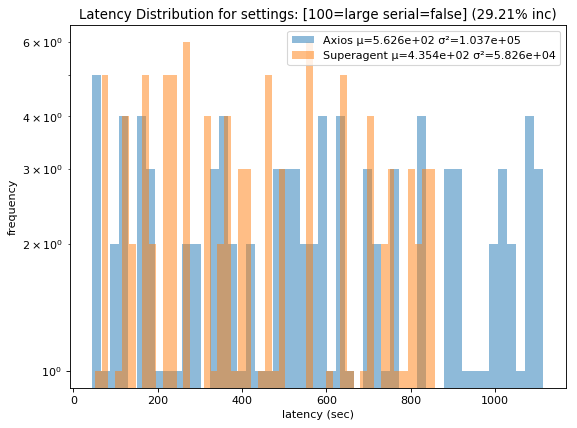

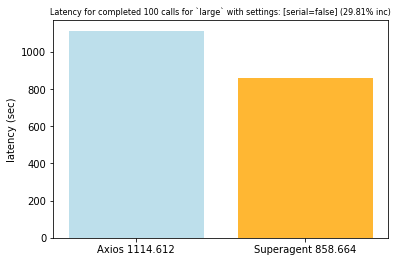

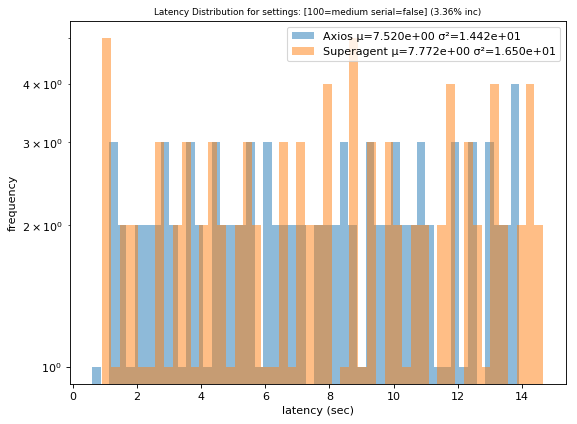

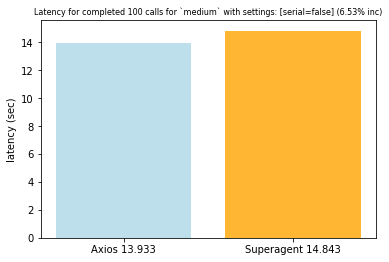

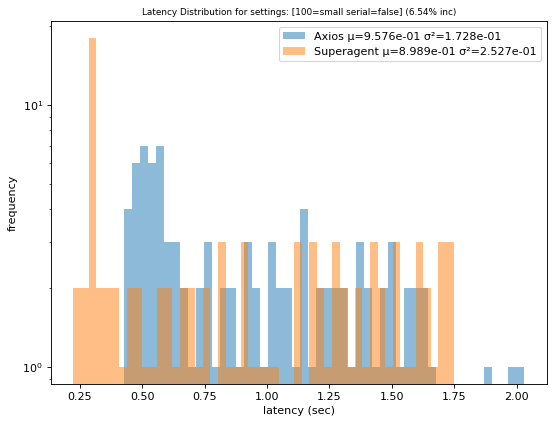

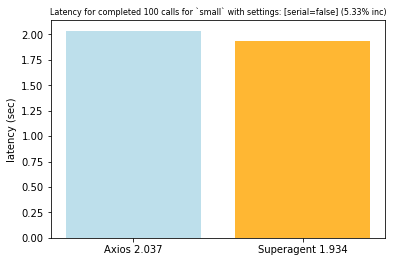

In [115]:

storage = load()
print(" ")

for k in storage.keys():
    if "TP" in k:
        for k2 in storage[k].keys():
            jsonObj = storage[k][k2]
            k1 = k.split("="); 
            bar(jsonObj, "Latency for completed {} calls for `{}` with settings: [{}]".format(k1[0], k1[1], k2));
    else:
        for k2 in storage[k].keys():
            jsonObj = storage[k][k2]
            name = "Latency Distribution for settings: [{} {}]".format(k, k2)
            hist(jsonObj, name)




In [85]:
print(os.path.isdir)

<function isdir at 0x7fd296e4a510>
